In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving train.csv to train.csv


# Variable Characteristics

## Variable with missing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#cargamos df titanic
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.replace("?", np.nan, inplace=True)

**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=0)

In [ ]:
X_train.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
boat         573
body         831
home.dest    389
dtype: int64

* 20% de nans en el feature Edad.

* 77% de nans en el feature Cabin.(cabina en la que estuvo el pasajero)

* 20% de nans en el feature Embarked. (puerto desde el que el pasajero abordó el barco).

In [ ]:
X_train.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.191048
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.766376
embarked     0.002183
boat         0.625546
body         0.907205
home.dest    0.424672
dtype: float64

### Missing data Not At Random (MNAR)

Si hay un mecanismo o una razón por la que faltan datos, entonces esos datos no faltan al azar (MNAR).

Dependiendo del mecanismo por el cual ocurren los valores faltantes, podemos elegir diferentes métodos de imputación de datos faltantes.

In [ ]:
# creamos una variable binaria que indique cdo
# el valor de Cabin es nan
X_train["cabin_is_nan"] = np.where(X_train["cabin"].isnull(), 1, 0)

In [ ]:
# agrupamos por subreviviente y
# calculamos la media del feature cabin_is_nan
X_train.groupby(["survived"])["cabin_is_nan"].mean()

survived
0    0.866785
1    0.606232
Name: cabin_is_nan, dtype: float64

Estos porcentajes podría respaldar la hipótesis de que faltan datos porque después de que las personas murieron, no se pudo recuperar la información.

**OBS**: Para comprender realmente si los datos no están perdidos al azar, tendríamos que ayudaria saber la forma en que se recopilaron los datos.

In [ ]:
X_train['age'].isnull().groupby(X_train['survived']).mean()

survived
0    0.227353
1    0.133144
Name: age, dtype: float64

### Missing Completely at Random (MCAR)

La probabilidad de que falte un valor es la misma para todas las observaciones(MCAR).

**Si los datos son MCAR, ignorar las observaciones con datos faltantes no sesgaría las inferencias realizadas.**

No pareciera haber algun tipo de hipotesis/relacion del por que los nans en embarked.

In [ ]:
X_train[X_train['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_is_nan
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN,6,NaN,"Cincinatti, OH",0
168,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN,6,NaN,NaN,0


Si estos valores son MCAR, la probabilidad de que falten datos para estas dos mujeres es la misma que la probabilidad de que falten datos para cualquier otra persona en el Titanic.

In [ ]:
X_train.isnull().mean().loc["embarked"]

0.002183406113537118

In [ ]:
X_train.shape

(916, 15)

In [ ]:
2/X_train.shape[0]

0.002183406113537118

### Missing data at Random (MAR)

Si la probabilidad de que falte una observación depende de la información disponible (es decir, otras variables). Existe una relación entre la probabilidad de que falte un valor y los datos observados.

In [ ]:
df = pd.read_csv("loan.csv", usecols=['employment', 'time_employed'])

In [ ]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=0)

Ambas variables tienen aproximadamente el mismo porcentaje de observaciones faltantes.

In [ ]:
X_train.isnull().mean()

employment       0.062286
time_employed    0.053571
dtype: float64

In [ ]:
# cantidad de tipos de empleados.
print('Number of employments: {}'.format(
    len(X_train['employment'].unique())))

# tipos de empleados.
X_train['employment'].unique()

Number of employments: 12


array(['Teacher', 'Statistician', 'Other', 'Civil Servant', 'Nurse',
       'Accountant', 'Secretary', 'Bus driver', 'Dentist', 'Taxi driver',
       nan, 'Software developer'], dtype=object)

In [ ]:
X_train['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

In [ ]:
# clientes que declararon trabajo
r = X_train[~ X_train["employment"].isnull()]

# porcentaje de nans en tiempo con trabajo
r['time_employed'].isnull().mean()

0.0006093845216331506

**Esto apoya aún más la hipótesis de que los valores nans en employment están relacionados con los valores nans en el time_employed.**

In [ ]:
n_r = X_train[X_train["employment"].isnull()]

n_r["time_employed"].isnull().mean()

0.8509174311926605

## Different values can take a feature (Cardinality)

In [ ]:
# The machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To evaluate the models.
from sklearn.metrics import roc_auc_score

# To separate data into train and test.
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

In [ ]:
df.replace("?", np.nan, inplace=True)

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
print('Number of categories in the variable Name: {}'.format(
    df.name.nunique()))

print('Number of categories in the variable Gender: {}'.format(
    df.sex.nunique()))

print('Number of categories in the variable Ticket: {}'.format(
    df.ticket.nunique()))

print('Number of categories in the variable Cabin: {}'.format(
    df.cabin.nunique()))

print('Number of categories in the variable Embarked: {}'.format(
    df.embarked.nunique()))

print('Total number of passengers in the Titanic: {}'.format(len(df)))

Number of categories in the variable Name: 1307
Number of categories in the variable Gender: 2
Number of categories in the variable Ticket: 929
Number of categories in the variable Cabin: 186
Number of categories in the variable Embarked: 3
Total number of passengers in the Titanic: 1309


In [ ]:
df["cabin"].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

Capturemos solamente el primer caracter del valor del feature cabin.

In [ ]:
df["cabin_reduced"] = df["cabin"].astype(str).str[0]
df["cabin_reduced"].head()

0    B
1    C
2    C
3    C
4    C
Name: cabin_reduced, dtype: object

In [ ]:
print('Number of categories in the variable Cabin: {}'.format(
    df.cabin.nunique()))

print('Number of categories in the variable Cabin reduced: {}'.format(
    df.cabin_reduced.nunique()))

Number of categories in the variable Cabin: 186
Number of categories in the variable Cabin reduced: 9


In [ ]:
use_cols = ['cabin', 'cabin_reduced', 'sex']

X_train, X_test, y_train, y_test = train_test_split(
    df[use_cols], 
    df['survived'],  
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

**Distribución desigual en los features.**

Cuando una variable es altamente cardinal, **algunas categorías aparecen solo en el conjunto de entrenamiento y otras solo en el conjunto de prueba.**

* Si están presentes solo en el conjunto de entrenamiento, pueden causar un **overfitting**. 

* Si están presentes solo en el conjunto de prueba, el modelo de aprendizaje automático no sabrá cómo manejarlos, ya que no se vieron durante el entrenamiento.

Hay 116 valores de cabinas que se encuentran solo en X_train

In [ ]:
unique_to_train_set = [
    x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()
]

len(unique_to_train_set)

117

Este problema se puede mitigar reduciendo la cardinalidad de la variable.

In [ ]:
unique_to_train_set = [
    x for x in X_train['cabin_reduced'].unique()
    if x not in X_test['cabin_reduced'].unique()
]

unique_to_test_set = [
    x for x in X_test['cabin_reduced'].unique()
    if x not in X_train['cabin_reduced'].unique()
]

print("valores de cabin_reduced unicos de X_train: {} ".format(len(unique_to_train_set)))

print("valores de cabin_reduced unicos de X_test: {} ".format(len(unique_to_test_set)))

valores de cabin_reduced unicos de X_train: 1 
valores de cabin_reduced unicos de X_test: 0 


**Impacto de la cardinalidad en el rendimiento de los modelos de ML**

In [ ]:
cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
cabin_dict

{nan: 0,
 'E36': 1,
 'C68': 2,
 'E24': 3,
 'C22 C26': 4,
 'D38': 5,
 'B50': 6,
 'A24': 7,
 'C111': 8,
 'F': 9,
 'C6': 10,
 'C87': 11,
 'E8': 12,
 'B45': 13,
 'C93': 14,
 'D28': 15,
 'D36': 16,
 'C125': 17,
 'B35': 18,
 'T': 19,
 'B73': 20,
 'B57 B59 B63 B66': 21,
 'A26': 22,
 'A18': 23,
 'B96 B98': 24,
 'G6': 25,
 'C78': 26,
 'C101': 27,
 'D9': 28,
 'D33': 29,
 'C128': 30,
 'E50': 31,
 'B26': 32,
 'B69': 33,
 'E121': 34,
 'C123': 35,
 'B94': 36,
 'A34': 37,
 'D': 38,
 'C39': 39,
 'D43': 40,
 'E31': 41,
 'B5': 42,
 'D17': 43,
 'F33': 44,
 'E44': 45,
 'D7': 46,
 'A21': 47,
 'D34': 48,
 'A29': 49,
 'D35': 50,
 'A11': 51,
 'B51 B53 B55': 52,
 'D46': 53,
 'E60': 54,
 'C30': 55,
 'D26': 56,
 'E68': 57,
 'A9': 58,
 'B71': 59,
 'D37': 60,
 'F2': 61,
 'C55 C57': 62,
 'C89': 63,
 'C124': 64,
 'C23 C25 C27': 65,
 'C126': 66,
 'E49': 67,
 'F E46': 68,
 'E46': 69,
 'D19': 70,
 'B58 B60': 71,
 'C82': 72,
 'B52 B54 B56': 73,
 'C92': 74,
 'E45': 75,
 'F G73': 76,
 'C65': 77,
 'E25': 78,
 'B3': 79,
 'D

Creamos una nueva columna que sera la codificacion numerica de la variable cabin.

In [ ]:
X_train["cabin_mapped"] = X_train["cabin"].map(cabin_dict)
X_test["cabin_mapped"] = X_test["cabin"].map(cabin_dict)

X_train[["cabin_mapped", "cabin"]].head(10)

,cabin_mapped,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,3,E24


In [ ]:
# creamos el diccionario encodeando los diferentes tipos de cabin_reduced
cabin_dict = {cabin: num for num, cabin in enumerate(X_train['cabin_reduced'].unique(), 0)}
cabin_dict

{'n': 0, 'E': 1, 'C': 2, 'D': 3, 'B': 4, 'A': 5, 'F': 6, 'T': 7, 'G': 8}

Ahora codificaremos el valor de la columna cabin_reduced.

**obs**: ejecutar 2 veces esta celda causara valores nulos.

In [ ]:
# seteamos la columna cabin_reduced con los valores encodeados
X_train["cabin_reduced"] = X_train["cabin_reduced"].map(cabin_dict)
X_test["cabin_reduced"] = X_test["cabin_reduced"].map(cabin_dict)

X_train[["cabin_reduced", "cabin"]].head(20)

,cabin_reduced,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,1,E24


In [ ]:
# creamos el diccionario encodeando los diferentes tipos de sexo
genre_dict = {genre: num for num,genre in enumerate(X_train["sex"].unique(), 0)}
genre_dict

{'female': 0, 'male': 1}

In [ ]:
# seteamos la columna genre_mapped con los valores encodeados
X_train["genre_mapped"] = X_train["sex"].map(genre_dict)
X_test["genre_mapped"] = X_test["sex"].map(genre_dict)

X_train[["genre_mapped", "sex"]].head()

,genre_mapped,sex
501,0,female
588,0,female
402,0,female
1193,1,male
686,0,female


In [ ]:
# chequeamos que no haya valores nulos
X_train[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     0
cabin_reduced    0
sex              0
dtype: int64

In [ ]:
X_test[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     42
cabin_reduced     0
sex               0
dtype: int64

Evalúemos el efecto de la cardinalidad en los algoritmos de aprendizaje automático.

### Random Forests

In [ ]:
# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['cabin_mapped', 'genre_mapped']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['cabin_mapped', 'genre_mapped']])
pred_test = rf.predict_proba(X_test[['cabin_mapped', 'genre_mapped']].fillna(0))

El rendimiento de Random Forests en el conjunto de entrenamiento es bastante superior a su rendimiento en el conjunto de prueba. Esto indica que el modelo posee overfitting.

In [ ]:
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8561832352985574
Test set
Random Forests roc-auc: 0.7707953099939162


In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['cabin_reduced', 'genre_mapped']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['cabin_reduced', 'genre_mapped']])
pred_test = rf.predict_proba(X_test[['cabin_reduced', 'genre_mapped']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


### AdaBoost

In [ ]:
# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['cabin_mapped', 'genre_mapped']], y_train)

# Make predictions on train and test set
pred_train = ada.predict_proba(X_train[['cabin_mapped', 'genre_mapped']])
pred_test = ada.predict_proba(X_test[['cabin_mapped', 'genre_mapped']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8288181987430752
Test set
Adaboost roc-auc: 0.7593191748244014


El modelo Adaboost entrenado con la variable con alta cardinalidad presenta overfitting. Adaboost entrenado con la variable cardinal baja no presenta overfitting.

In [ ]:
# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['cabin_reduced', 'genre_mapped']], y_train)

# Make predictions on train and test set.
pred_train = ada.predict_proba(X_train[['cabin_reduced', 'genre_mapped']])
pred_test = ada.predict_proba(X_test[['cabin_reduced', 'genre_mapped']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8161256723642566
Test set
Adaboost roc-auc: 0.8001078480172557


### Logistic Regression

In [ ]:
# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['cabin_mapped', 'genre_mapped']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['cabin_mapped', 'genre_mapped']])
pred_test = logit.predict_proba(X_test[['cabin_mapped', 'genre_mapped']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8135594926008485
Test set
Logistic regression roc-auc: 0.7744732039157127


In [ ]:
# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['cabin_reduced', 'genre_mapped']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['cabin_reduced', 'genre_mapped']])
pred_test = logit.predict_proba(X_test[['cabin_reduced', 'genre_mapped']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602


### Gradient Boosted Classifier

In [ ]:
# The model.
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)

# Train the model.
gbc.fit(X_train[['cabin_mapped', 'genre_mapped']], y_train)

# Make predictions on train and test set
pred_train = gbc.predict_proba(X_train[['cabin_mapped', 'genre_mapped']])
pred_test = gbc.predict_proba(X_test[['cabin_mapped', 'genre_mapped']].fillna(0))

print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.864465454691832
Test set
Gradient Boosted Trees roc-auc: 0.7684447762844976


In [ ]:
# call the model
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)

# train the model
gbc.fit(X_train[['cabin_reduced', 'genre_mapped']], y_train)

# make predictions on train and test set
pred_train = gbc.predict_proba(X_train[['cabin_reduced', 'genre_mapped']])
pred_test = gbc.predict_proba(X_test[['cabin_reduced', 'genre_mapped']].fillna(0))

print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.816719415917359
Test set
Gradient Boosted Trees roc-auc: 0.8015181682429069


### Podemos ver que en todos los modelos se repite el mismo ejemplo, combiene bajar la cardinalidad de la variable para tener overfitting

## Rare Labels

**OBS A TENER EN CUENTA:**
* Los features raros pueden provocar un overfitting excesivo, especialmente en los métodos basados en árboles.

* Los features poco frecuentes pueden agregar ruido, lo que podría causar un overfitting excesivo.

* Los features raras pueden estar presentes solo en el conjunto de entrenamiento, lo que provoca un overfitting excesivo.

* Los features raras pueden aparecer solo en el conjunto de prueba. Por lo tanto, el modelo de ML no sabrá cómo evaluarlo.

* A veces los features raros, son de hecho importantes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

#X_train = pd.read_csv("test.csv", usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd'])
df= pd.read_csv("train.csv", usecols=use_cols)

In [ ]:
df.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [ ]:
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' numero de valores unicos: ', df[col].nunique())

print('total houses: ', len(df))

variable:  Neighborhood  numero de valores unicos:  25
variable:  Exterior1st  numero de valores unicos:  15
variable:  Exterior2nd  numero de valores unicos:  16
total houses:  1460


Algunos features aparecen en más del 10% de las casas y muchos aparecen en menos del 10% o incluso en el 5% de las casas. 

**Estos son features poco frecuentes o valores raros y podrían causar un ajuste excesivo.**

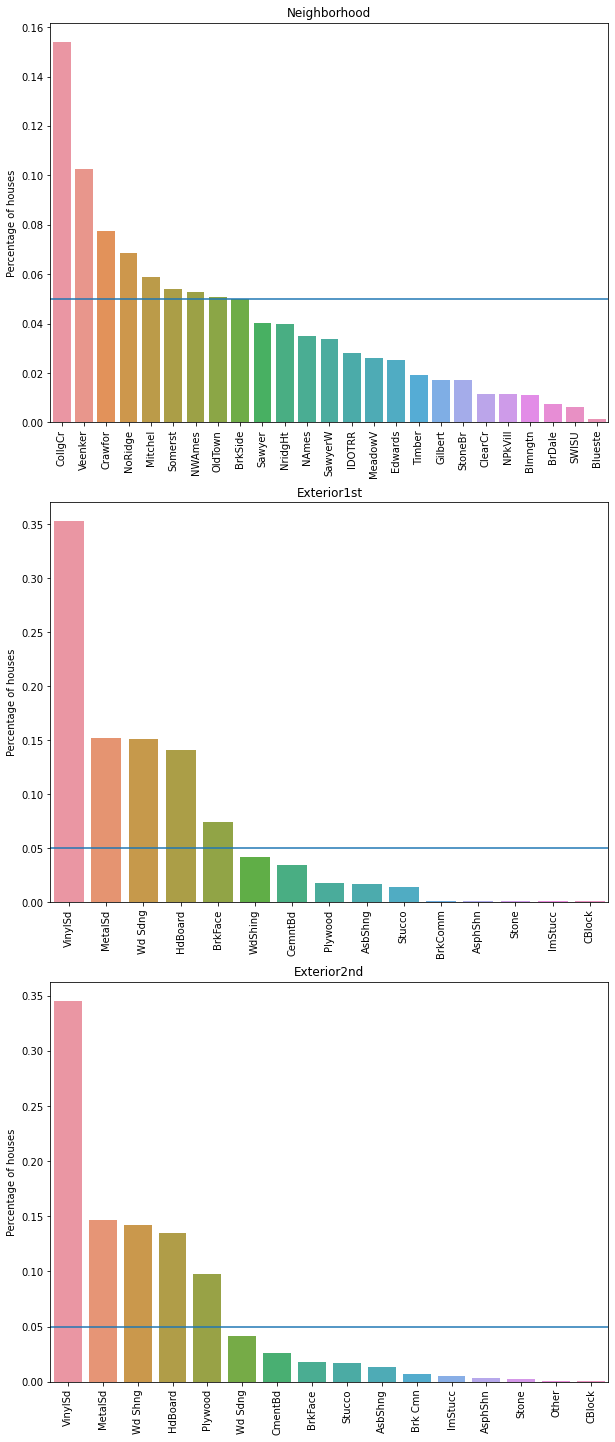

In [ ]:
f, axs = plt.subplots(3, 1, figsize=(10,25))

idx = 0
for col in cat_cols:

  # porcentaje de casas por categoria
  percent_of_houses = df[col].value_counts(normalize=True)

  # anado una linea constante en y = 0.05
  sns.barplot(x=df[col].unique(), y=percent_of_houses, ax=axs[idx]).axhline(0.05)
  
  axs[idx].set_title(col)
  axs[idx].set_ylabel("Percentage of houses")
  axs[idx].set_xticklabels(labels=df[col].unique(), rotation=90)

  idx = idx + 1

In [ ]:
df.groupby(df["Neighborhood"])["SalePrice"].mean().sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [ ]:
def calculate_mean_target_per_category(df, var):
  
  # value_count devuelve la serie ordenada
  # recupero el nombre de la columna haciendo rename_axis.
  perc_house = df[var].value_counts(normalize=True).rename_axis(var).reset_index(name="percentage_of_houses")

  # Agrupo, x valores unicos en el feature, y
  # calculo la media del saleprice.
  result_df = df.groupby(df[var])["SalePrice"].mean().reset_index()
  result_df = perc_house.merge(result_df, how="inner", on=var)

  return result_df


In [ ]:
# obtenemos el porcentaje de casas por barrio y
# el precio promedio de una casa en dicho barrio
temp_df = calculate_mean_target_per_category(df, "Neighborhood")

In [ ]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    plt.xticks(df.index, df[var], rotation=90)
    ax2 = ax.twinx()
    ax.bar(df.index, df["percentage_of_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

* Las casas en 'NridgHt' se venden a un precio alto, mientras que las casas en 'Sawyer' tienden a ser más baratas.

* Las casas en StoneBr tienen en promedio un precio de venta alto, por encima de 300k. Sin embargo, **menos del 5% de las casas son de StoneBr.**

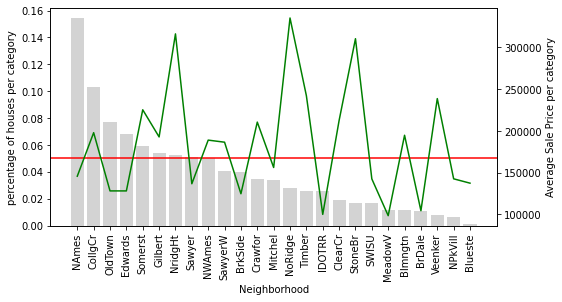

In [ ]:
plot_categories(temp_df, 'Neighborhood')

La mayoría de las categorías de la variable "Exterior2nd" están presentes en menos del 5% de las viviendas. Además, el "precio de venta" varía mucho entre esas categorías raras. 

**Estas etiquetas raras podrían ser muy predictivas, o podrían estar introduciendo ruido en lugar de información.**

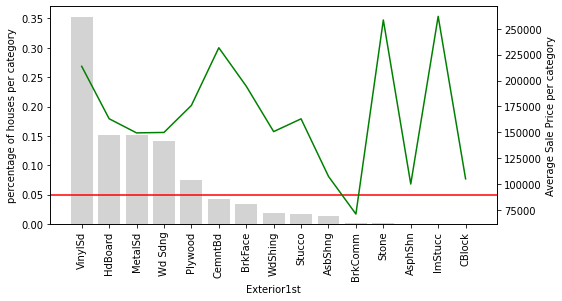

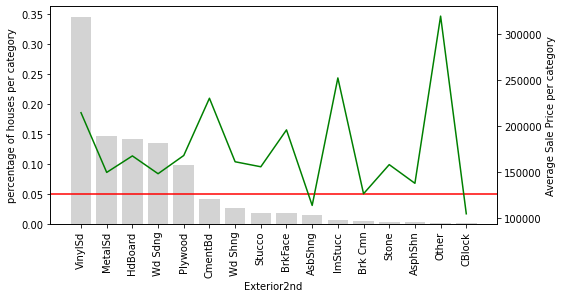

In [ ]:
for col in cat_cols:
    
    if col !='Neighborhood':
        
        temp_df = calculate_mean_target_per_category(df, col)
        plot_categories(temp_df, col)

**Grouping rare labels**: Una forma común de manejar valores raros es agruparlos bajo una categoría general llamada 'Raro' u 'Otro'. Así, somos capaces de comprender su impacto "colectivo" en el objetivo.

In [ ]:
# reemplazara los valores que aparezcan una cantidad de veces menor al 5%
def group_rare_labels(df, var):

  df_ = df[[var]].copy()

  # calculo los porcentajes de valores de los labels de un feature
  perc_of_label = df[var].value_counts(normalize=True)
  
  # obtengo los labels con valores menores al 5%
  labels_lss_05 = [label for label in perc_of_label.index if  perc_of_label.loc[label] < 0.05  ]
  
  # reemplazo los valores atipicos por el str raro
  df_[f"{var}_grouped"] = np.where(df[var].isin(labels_lss_05), "Rare", df[var] )
    
  return df_[[f"{var}_grouped"]]

In [ ]:
df["Neighborhood_grouped"] = group_rare_labels(df, "Neighborhood")

In [ ]:
df[["Neighborhood","Neighborhood_grouped"]].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,Rare
2,CollgCr,CollgCr
3,Crawfor,Rare
4,NoRidge,Rare
5,Mitchel,Rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,Rare


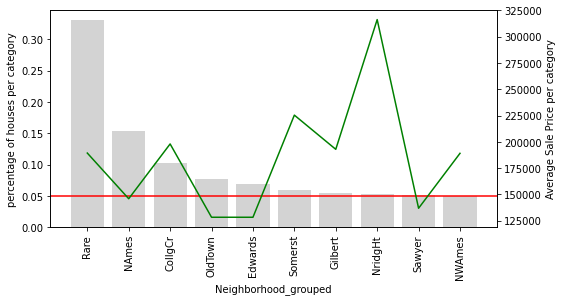

In [ ]:
temp_df = calculate_mean_target_per_category(df, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

Solo 9 categorías de Neighborhood son relativamente comunes en el conjunto de datos. Los restantes ahora se agrupan en 'raro', que captura el precio de venta promedio para todas las etiquetas poco frecuentes.

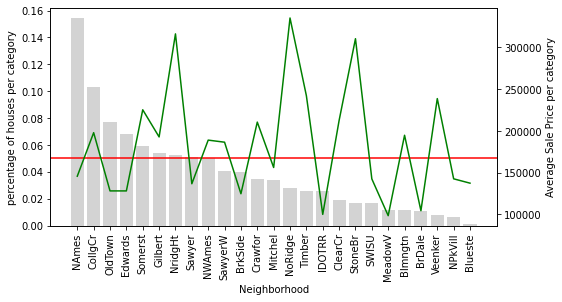

In [ ]:
temp_df = calculate_mean_target_per_category(df, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

en la variable Exterior1st, las casas con valores raros son en promedio más caras (excepto aquellas con VinySd). Lo mismo es cierto para Exterior2nd. Las categorías raras parecen tener algo en común.

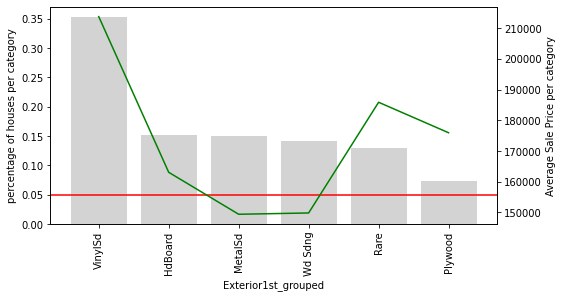

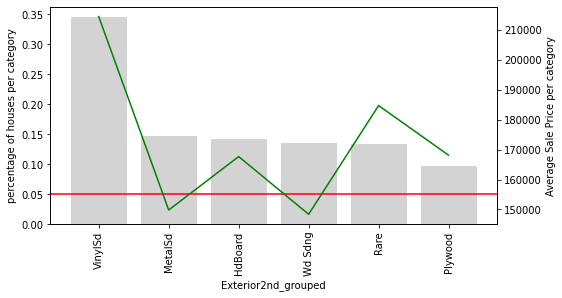

In [ ]:
for col in cat_cols[1:]:
        
    # Re-using the functions I created.
    df[col+'_grouped'] = group_rare_labels(df, col)
    temp_df = calculate_mean_target_per_category(df, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

# Handling Missing Data

## Complete Case Analysis

Consiste en descartar observaciones con valores faltantes. En otras palabras, solo mantenemos observaciones con datos de todas las variables. Supone Missing Completely at Random (MCAR)

Ventajas y desventajas:

* CCA funciona bien cuando los datos faltan completamente al azar.

* No se requiere manipulación de datos.

* Conserva la distribución (suponiendo que falten datos al azar).

* Puede descartar una gran fracción del conjunto de datos original.

* Las observaciones excluidas pueden ser informativas (si no faltan datos al azar).



In [ ]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# obtenemos los features con valores nulos
feat_with_nan = [feat for feat in df.columns if df[feat].isnull().any()]

Las primeras 6 variables contienen mucha información faltante, por lo que no podemos usar CCA si consideramos esas variables, porque descartaríamos la mayoría de las observaciones en el conjunto de datos.

omitiré las primeras seis variables que tienen muchos datos faltantes y usaré CCA en el resto del conjunto de datos.

In [ ]:
# obtenemos una proporcion de valores nulos deacuerdo al feature
perc_of_nans= df[feat_with_nan].isnull().mean().sort_values(ascending=False)
perc_of_nans

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [ ]:
# recorremos la serie y guardamos los indices de los features que tengan una
#  proporcion de nans < 5%
vars_cca = perc_of_nans.iloc[[i for i in range(len(perc_of_nans)) if  perc_of_nans.values[i]< 0.05]].index
vars_cca

Index(['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [ ]:
len(df.dropna(subset=vars_cca)) / len(df)

0.9671232876712329

Podemos ver la cantidad de filas que se han removido..

In [ ]:
data_cca = df.dropna(subset=vars_cca)

df.shape, data_cca.shape

((1460, 81), (1412, 81))

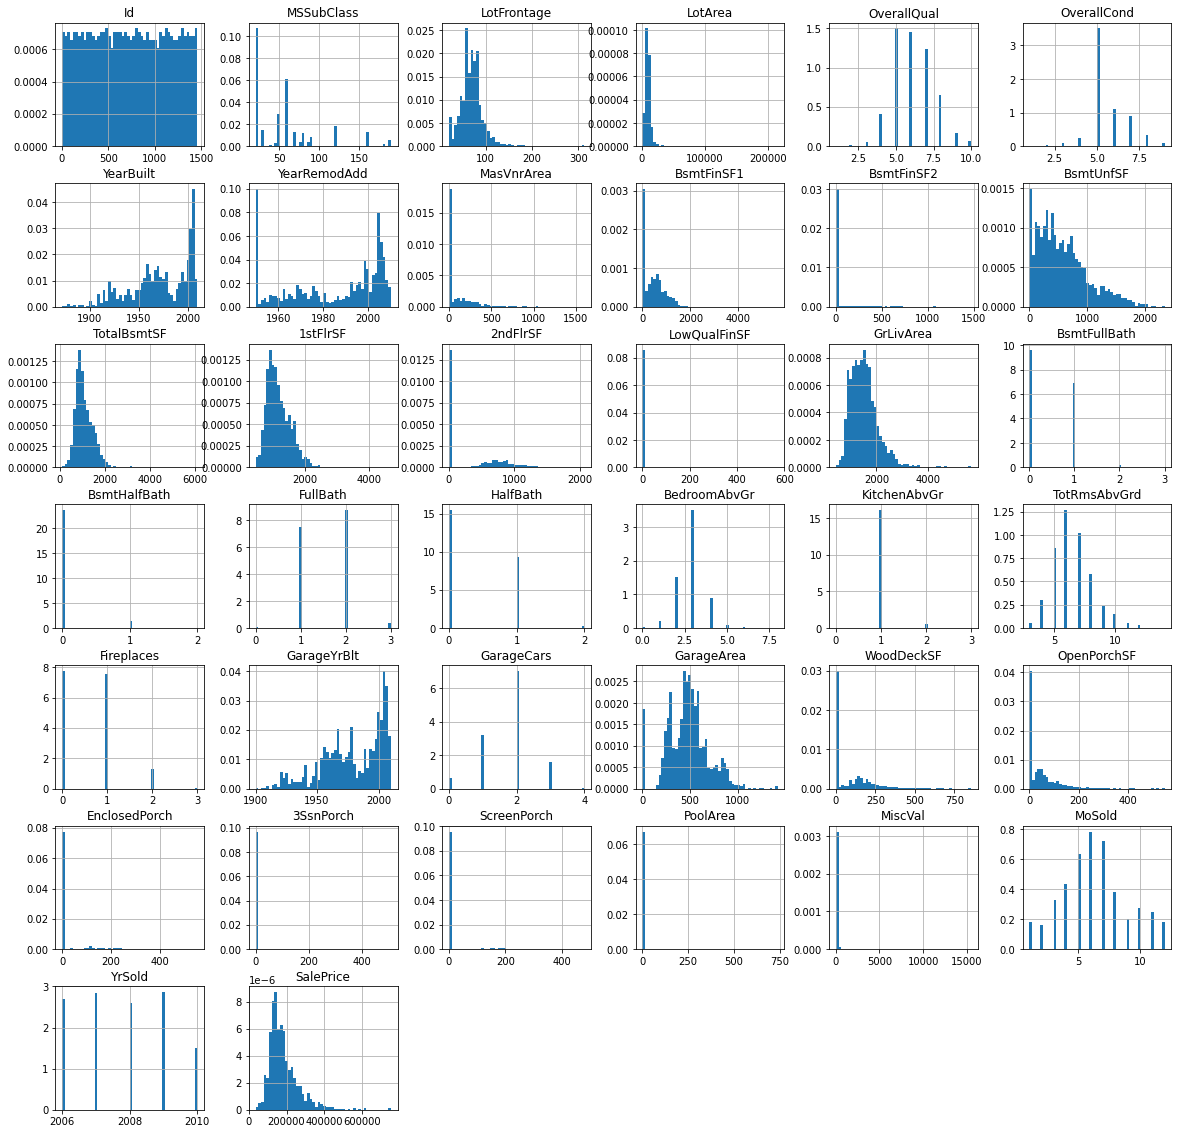

In [ ]:
data_cca.hist(bins=50, density=True, figsize=(20, 20))

plt.show()

Veamos algunas distribuciones antes de la eliminacion de los nans y dsp.

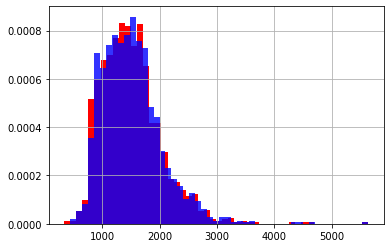

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data.
df['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# after cca
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

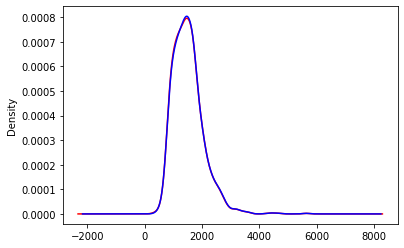

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data.
df['GrLivArea'].plot.density(color='red')

# after cca.
data_cca['GrLivArea'].plot.density(color='blue')

la distribución de las variables numéricas en los conjuntos de datos del caso original y completo es muy similar.

**Que es lo que esperamos de CCA cuando faltan datos al azar.**

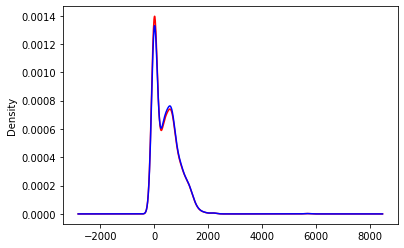

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data.
df['BsmtFinSF1'].plot.density(color='red')

# after cca.
data_cca['BsmtFinSF1'].plot.density(color='blue')

In [ ]:
df["BsmtQual"].value_counts(normalize=True).rename_axis("BsmtQual").reset_index(name="percentage")

,BsmtQual,percentage
0,TA,0.456079
1,Gd,0.434294
2,Ex,0.085032
3,Fa,0.024596


## Median/Mean/Random Imputation

Consiste en reemplazar los valores faltantes por la media/mediana de dicho feature.
Supone Missing Completely at Random (MCAR)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

In [ ]:
vars_w_nulls = [var for var in df.columns if df[var].isnull().any()]
vars_w_nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Ordenamos los features con valores nulos segun el porcentaje que tienen de nans.

In [ ]:
df[vars_w_nulls].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df,
                                                    df["SalePrice"], 
                                                    train_size=0.7, 
                                                    random_state=0
                                                    )

Vemos la distribucion de la variable LotFrontage antes de la imputation.

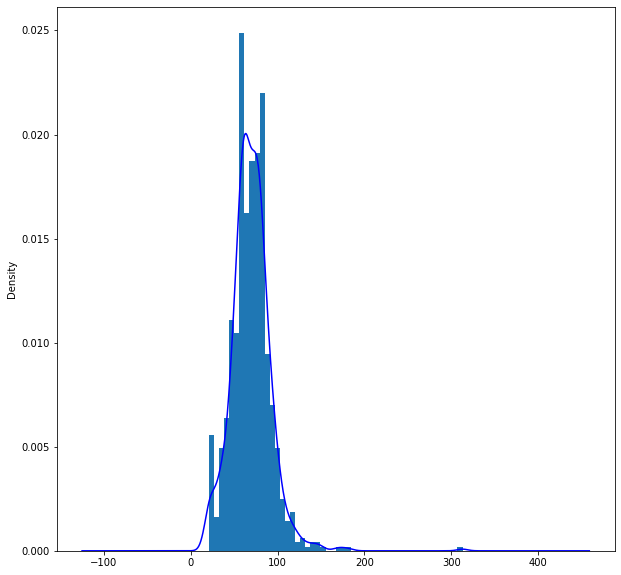

In [ ]:
X_train["LotFrontage"].hist(bins=50, density=True, figsize=(10, 10))
X_train["LotFrontage"].plot.density(color='blue')

**Mean / Median imputation for numerical vars**

Aplicamos dos tipos de imputation a la variable LotFrontage.
* En LotFrontage_mean reemplazaremos los valores nulos por la media de LotFrontage.
* En LotFrontage_median reemplazamos los valores nulos por la mediana de LotFrontage.

In [ ]:
# mean imputation 
mean_lotFrontage = X_train["LotFrontage"].mean().round(1)
X_train["LotFrontage_mean"]= X_train["LotFrontage"].fillna(mean_lotFrontage)

# median imputation
meadian_LotFrontage = X_train["LotFrontage"].median()
X_train["LotFrontage_median"]= X_train["LotFrontage"].fillna(meadian_LotFrontage)

X_train[["LotFrontage","LotFrontage_mean", "LotFrontage_median"]].head(10)

,LotFrontage,LotFrontage_mean,LotFrontage_median
682,NaN,69.7,69.0
960,50.0,50.0,50.0
1384,60.0,60.0,60.0
1100,60.0,60.0,60.0
416,74.0,74.0,74.0
1034,50.0,50.0,50.0
853,NaN,69.7,69.0
472,35.0,35.0,35.0
1011,75.0,75.0,75.0
328,NaN,69.7,69.0


**OBS:** Vemos como ha cambiado nuestra distribucion de los datos debido a imputar los valores nulos por la media/mediana respect.

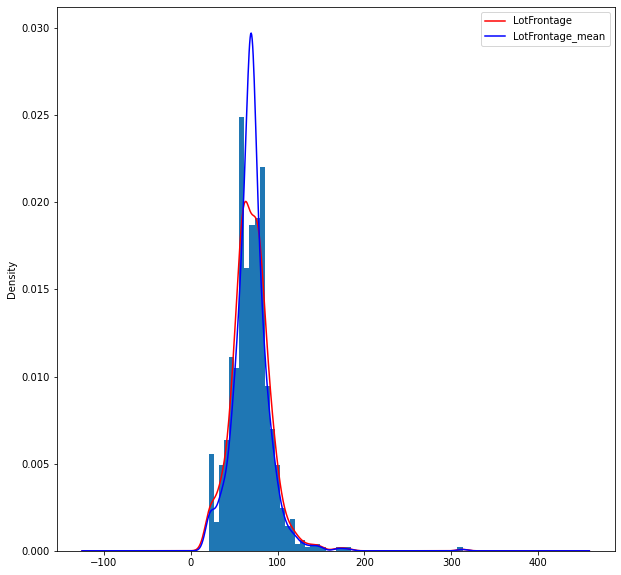

In [ ]:
X_train["LotFrontage"].hist(bins=50, density=True, figsize=(10, 10))
X_train["LotFrontage"].plot.density(color='red')
X_train["LotFrontage_mean"].plot.density(color='blue')
plt.legend(["LotFrontage", "LotFrontage_mean"], loc="upper right")

Podemos calcular la varianza de la variable original y tmb de LotFrontage_mean y LotFrontage_median, para ver cto cambia este valor.

In [ ]:
print('Original variable variance: ', X_train['LotFrontage'].var())
print('Variance after mean imputation: ', X_train['LotFrontage_mean'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original variable variance:  532.5872021885677
Variance after mean imputation:  434.4242184325248
Variance after median imputation:  434.4913061012848


Al parecer dsp de la imputacion obtenemos muchos mas outliars que antes.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


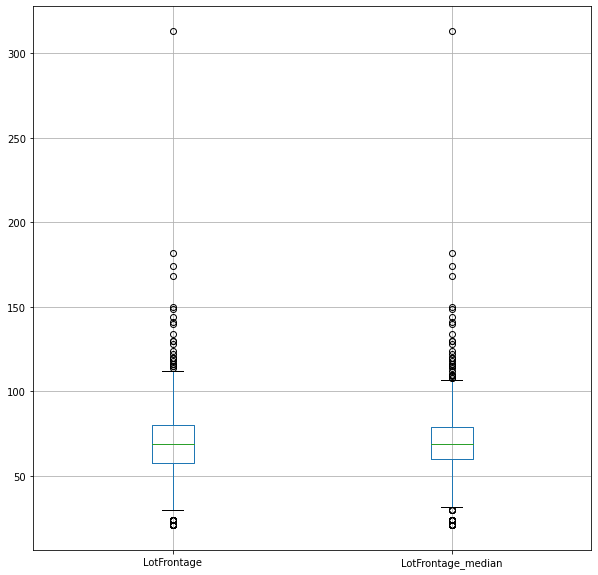

In [ ]:
X_train[['LotFrontage', 'LotFrontage_median']].boxplot(figsize=(10,10))

Tenemos 5% de porcentaje de datos nulos en el feature GarageYrBlt

In [ ]:
X_train["GarageYrBlt"].isnull().mean()

0.05288932419196866

Aqui al tener un % bajo de valores nulos reemplazarlos por el valor medio no alterara significativamente la presencia de outliars ni tmpoco los rangos intercuartiles.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


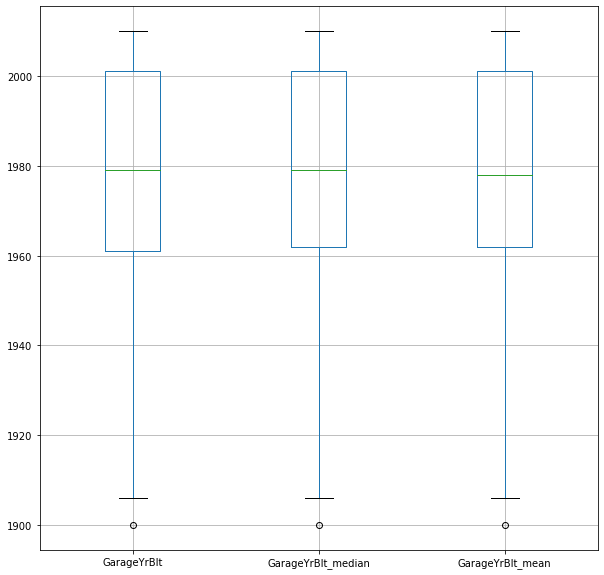

In [ ]:
mean_garageyrblt = X_train["GarageYrBlt"].mean()
median_garageyrblt = X_train["GarageYrBlt"].median()

X_train["GarageYrBlt_mean"] = X_train["GarageYrBlt"].fillna(mean_garageyrblt)
X_train["GarageYrBlt_median"] = X_train["GarageYrBlt"].fillna(median_garageyrblt)
X_train[["GarageYrBlt", "GarageYrBlt_median", "GarageYrBlt_mean"]].boxplot(figsize=(10,10))

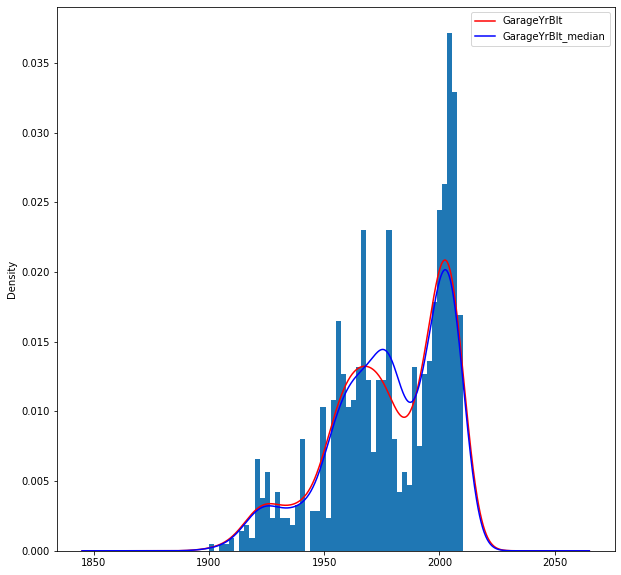

In [ ]:
X_train["GarageYrBlt"].hist(bins=50, density=True, figsize=(10, 10))
X_train["GarageYrBlt"].plot.density(color='red')
X_train["GarageYrBlt_median"].plot.density(color='blue')

plt.legend(["GarageYrBlt", "GarageYrBlt_median"], loc="upper right")

**OBS:** Vemos como cambia la cov.

In [ ]:
X_train[["GarageYrBlt", "GarageYrBlt_median", "LotFrontage","LotFrontage_median", "LotFrontage_mean", "Fence", "OverallQual"]].cov()

,GarageYrBlt,GarageYrBlt_median,LotFrontage,LotFrontage_median,LotFrontage_mean,OverallQual
GarageYrBlt,624.538234,624.538234,30.611717,24.804529,24.808524,17.904053
GarageYrBlt_median,624.538234,591.525419,28.095264,22.916574,22.916937,16.873917
LotFrontage,30.611717,28.095264,532.587202,532.587202,532.587202,6.587119
LotFrontage_median,24.804529,22.916574,532.587202,434.491306,434.420920,5.390546
LotFrontage_mean,24.808524,22.916937,532.587202,434.420920,434.424218,5.372201
OverallQual,17.904053,16.873917,6.587119,5.390546,5.372201,1.844835


**Frequent category imputation**

Nuevamente podemos reemplazar los valores nulos por aquellos que aparecen mas frecuentemente en nuestros datos.

In [ ]:
# obtenemos las variables categoricas con valores nulos
vars_cat_w_nulls = [var for var in vars_w_nulls if X_train[var].dtype == np.object_]
vars_cat_w_nulls

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

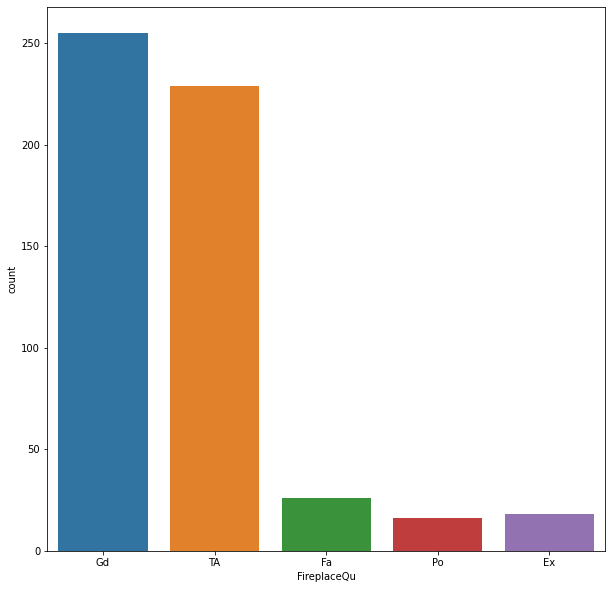

In [ ]:
figure = plt.figure(figsize=(10,10))
sns.countplot(x=X_train["FireplaceQu"])

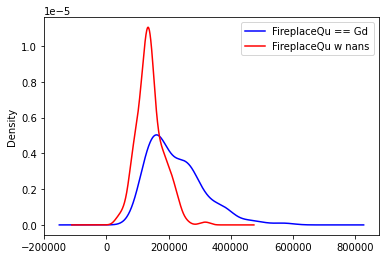

In [ ]:
# al tratarse de variables categoricas no podemos plotear la densidad de estas ya que no tiene sentido
# pero si podemos plotear la distribucion del target en aquellas filas que posean tal valor el feature "FireplaceQu"
X_train[X_train["FireplaceQu"]=="Gd"]["SalePrice"].plot.density(color='blue')
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot.density(color='red')
plt.legend(["FireplaceQu == Gd", "FireplaceQu w nans"])

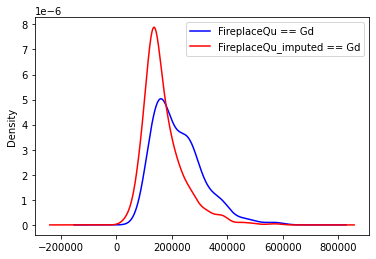

In [ ]:
X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"].fillna("Gd")

X_train[X_train["FireplaceQu"]=="Gd"]["SalePrice"].plot.density(color='blue')
X_train[X_train['FireplaceQu_imputed'] == "Gd"]['SalePrice'].plot.density(color='red')
plt.legend(["FireplaceQu == Gd", "FireplaceQu_imputed == Gd"])

**OBS:** Otra tecnica que podria resultar util es reemplezar los valores categoricos nulos por la simple palabra de MISSING, ie estariamos creando un nuevo valor en nuestro feature categorico que indicaria que dicho campo es nulo.

**Random Sampling for Numerical Variables**

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

df.replace("?", np.nan, inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df["age"] = pd.to_numeric(df["age"])
df["fare"] = pd.to_numeric(df["fare"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    df.survived,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((916, 14), (393, 14))

Vamos a aplicar el metodo de Random Sampling a la variable "age".

* 1) Tomamos una muestra aleatoria de los valores que puede tomar el feature "age" ( es importante que la muestra aleatoria sea sobre los valores distintos de null)
* 2) El tamano de la muestra aleatoria sera igual a la cantidad de valores nulos que tendremos en la variable "age".

**OBS:** la muestra que se toma no es completamente aleatoria sino pseudo aleatoria ya que fijamos una semilla. se pueden lograr diversos resultados fijando la semilla por ejm igual al campo "fare" pertinente a cada obs.

Esto puede resultar util si vemos que nuestros valores nulos dependen de otra variable.

In [ ]:
X_train["age_imputed"] = X_train["age"].copy()
X_test["age_imputed"] = X_test["age"].copy()

random_sample_train = X_train["age"].dropna().sample(
    X_train["age"].isnull().sum(), random_state=0)

# hacemos lo mismo para el conjunto de test
# teniendo en cta que la muestra se tomara de el conjunto de entrenamiento
# para evitar overfitting.
random_sample_test = X_train['age'].dropna().sample(
    X_test['age'].isnull().sum(), random_state=0)

# guardamos los indices en donde tenemos los valores nulos de la variable age
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

# reemplazamos los valores nulos con nuestra muestra aleatoria
X_train.loc[X_train["age"].isnull(), "age_imputed"] = random_sample_train
X_test.loc[X_test["age"].isnull(), "age_imputed"] = random_sample_test

Checkeamos que no haya valores nulos.

In [ ]:
X_train["age_imputed"].isnull().sum()

0

In [ ]:
X_test["age_imputed"].isnull().sum()

0

**Vemos que el metodo preserva la distribucion de la variable original.**

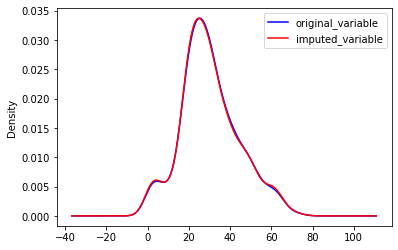

In [ ]:
X_train['age'].plot.density(color='blue')
X_train['age_imputed'].plot.density(color='red')

plt.legend(["original_variable", "imputed_variable"])

Por lo tanto la varianza se mantiene bastante similar.

In [ ]:
print('Original variable variance: ', X_train['age'].var())
print('Variance after random imputation: ', X_train['age_imputed'].var())

Original variable variance:  194.16304666581863
Variance after random imputation:  198.53703762759557


**OBS:** Por otro lado la cov si que cambia con respecto a la variable original y a la imputada.

In [ ]:
X_train[['fare', 'age', 'age_imputed']].cov()

,fare,age,age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
age_imputed,100.938070,194.163047,198.537038


Por ultimo podemos observar que el rango intercuartil y los outliars se mantienen bastante similar.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


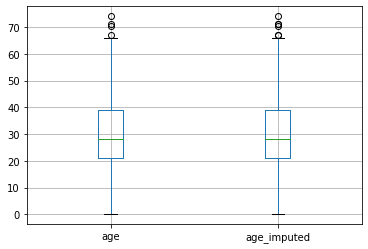

In [ ]:
X_train[['age', 'age_imputed']].boxplot()

**Random Sampling for Categorical Variables**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

df = pd.read_csv("train.csv", usecols=cols_to_use)

df.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    df.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

Realizamos el mismo procedimiento que hicimos para variables numericas.

In [ ]:
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()


random_sample_train = X_train['BsmtQual'].dropna().sample(
    X_train['BsmtQual'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual'].dropna().sample(
    X_test['BsmtQual'].isnull().sum(), random_state=0)


random_sample_train.index = X_train[X_train['BsmtQual'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual'].isnull()].index

X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_test

Ahora veamos si la distribucion de valores categoricos se sigue respetando dsp del procedimiento.
Para ello debemos calcular cual es el porcentaje de valores unicos en una variable antes y dsp de la imputacion. Si este valor es similar => nuestra distribucion no habra cambiado significativamente.

In [ ]:
def categorical_distribution(df, variable_original, variable_imputed):
  tmp = pd.concat(
    [
      # porcentaje de valores unicos de un feature, antes de la imputacion
      df[variable_original].value_counts() / len(df[variable_original].dropna()),

      # porcentaje de valores unicos de un feature, dsp de la imputacion
      df[variable_imputed].value_counts() / len(df)
    ],
    axis=1)

  # add column names
  tmp.columns = ['original', 'imputed']

  return tmp

Vemos que la distribucion de la variable categorica "BsmtQual" no cambia significativamente dsp de la imputacion por valores de una muestra pseudo aleatoria.

In [ ]:
categorical_distribution(X_train, "BsmtQual", "BsmtQual_imputed")

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


Para hacerlo mas graficamente, viendo la distribucion del target segun nuestra variable "BsmtQual", comparando antes y dsp de la imputacion.

In [ ]:
df["BsmtQual"].dropna().unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
def automate_plot(df, variable, target):

  f = plt.figure(figsize=(10,10))

  for unique_value in df["BsmtQual"].dropna().unique():
    df[df[variable] == unique_value][target].plot.density()c

  plt.legend(df["BsmtQual"].dropna().unique(), loc='best')

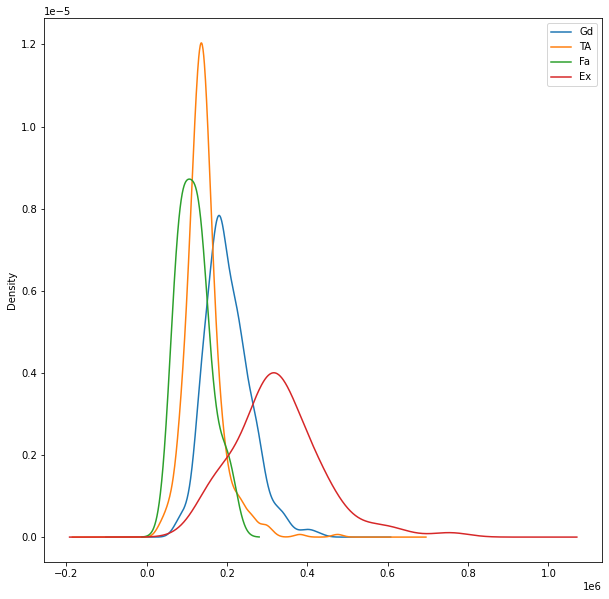

In [ ]:
automate_plot(X_train, "BsmtQual", "SalePrice")

## Missing Indicator

Consiste en crear un nuevo feature, binario, que indicara los valores nulos.

**OBS:** A pesar de crear una nueva variable que indique los valores nulos, vamos a seguir necesitando imputar los valores nulos en aquellas columnas que poseen nans.


Suposiciones:
* Missing data Not At Random (MNAR).

* Los datos faltantes son predictivos.

Ventajas:
* Captura la importancia de los datos faltantes, si los hay.

Limitaciones:
* Expande el feature-space.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl',usecols=['age', 'fare', 'survived'])

df.replace("?", np.nan, inplace=True)
df.head()

,survived,age,fare
0,1,29,211.3375
1,1,0.9167,151.55
2,0,2,151.55
3,0,30,151.55
4,0,25,151.55


In [ ]:
df["age"] = pd.to_numeric(df["age"])
df["fare"] = pd.to_numeric(df["fare"])
df["survived"] = pd.to_numeric(df["survived"])

In [ ]:
df.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'], 
    test_size=0.3, 
    random_state=0) 

X_train.shape, X_test.shape

((916, 2), (393, 2))

Creamos el feature "age_NA" que indicara si la fila i-esima de "age" es nula.

In [ ]:
X_train['age_NA'] = np.where(X_train['age'].isnull(), 1, 0)
X_train[["age", "age_NA"]].head(10) 

,age,age_NA
501,13.0,0
588,4.0,0
402,30.0,0
1193,NaN,1
686,22.0,0
971,NaN,1
117,30.0,0
540,2.0,0
294,49.0,0
261,35.0,0


Por ultimo aplicamos mean imputation en la columna age.

In [ ]:
mean_age = X_train["age"].mean()

X_train["age"] = X_train["age"].fillna(mean_age)
X_train["age"].isnull().sum()

0

## Handling missing values with scikit-learn in a pipeline

In [ ]:
# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('SalePrice', axis=1),
    df['SalePrice'], 
    test_size=0.3,
    random_state=0) 
X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [ ]:
numerical_feature = [feature for feature in X_train.columns if X_train[feature].dtype != np.object_]
categorical_feature = [feature for feature in X_train.columns if feature not in numerical_feature]

In [ ]:
# pipeline que se encagara de transformar los valores numericos
# imputando los nans por la media y escalando los datos
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

# pipeline que se encargara de transformar los valores categ
# imputando los nans por el valor mas frecuente de estos y
# aplicando el aprouch onehotencoder
categoric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ensamblamos los pipelines especificando las columnas a las cuales se aplicaran
# los transformadores ya declarados
preprocessor = ColumnTransformer(transformers=[
    ("numerical", numeric_transformer, numerical_feature),
    ("categorical", categoric_transformer, categorical_feature)
])

# ensamblamos el ultimo pipeline 
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Lasso(max_iter=2000))])

In [ ]:
# declaramos el grid con todos los parametros que queremos testear
# obs prestar atencion a como se declararon los pipelines y tmb el nombre de dichos pasos
param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='r2')

* 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
* 100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

In [ ]:
grid_search.fit(X_train, y_train)

# printeamos el mejor score del conjunto de entrenamiento
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.933


In [ ]:
grid_search.score(X_test, y_test)

0.7379670441295108

In [ ]:
grid_search.best_params_

{'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median',
 'regressor__alpha': 100}

# Handling Categorical Values

## One Hot Encoding.

(aca al finalizar debo poner una descrip)

In [ ]:
# to split the datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl', usecols=["sex", "cabin", "embarked", "survived"])
df.replace("?", np.nan, inplace=True)
df.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22 C26,S
2,0,female,C22 C26,S
3,0,male,C22 C26,S
4,0,female,C22 C26,S


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("survived", axis=1), 
                                                    df["survived"],
                                                    train_size= 0.7,
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape

((916, 3), (393, 3))

In [ ]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == np.object_]
categorical_features

['sex', 'cabin', 'embarked']

Podemos ver que tenemos 3 valores distintos, procedemos a aplicar el aprouch de Ordinal encoding.

In [ ]:
X_train["embarked"].fillna("Missing").value_counts()

S          652
C          179
Q           83
Missing      2
Name: embarked, dtype: int64

In [ ]:
X_train["cabin"].value_counts()

C23 C25 C27    5
C78            4
G6             4
F33            3
F4             3
              ..
A9             1
E68            1
C30            1
E60            1
B78            1
Name: cabin, Length: 150, dtype: int64

In [ ]:
X_train["cabin"] = df["cabin"].astype(str).str[0]

In [ ]:
encoder = OneHotEncoder(categories="auto",
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels

tmp_train = pd.DataFrame(encoder.fit_transform(X_train[["embarked", "sex"]].fillna('Missing')))
tmp_test = pd.DataFrame(encoder.transform(X_test[["embarked", "sex"]].fillna('Missing')))

In [ ]:
# recuperamos el nombre de las columnas
tmp_train.columns = encoder.get_feature_names_out(["embarked","sex"])
tmp_test.columns = encoder.get_feature_names_out(["embarked","sex"])

In [ ]:
X_train = pd.concat([X_train.drop(["sex","embarked"], axis=1), tmp_train], axis=1)
X_test = pd.concat([X_test.drop(["sex","embarked"], axis=1), tmp_test], axis=1)
X_train.head()

,cabin,embarked_C,embarked_Missing,embarked_Q,embarked_S,sex_female,sex_male
0,B5,0.0,0.0,0.0,1.0,1.0,0.0
1,NaN,0.0,0.0,0.0,1.0,1.0,0.0
2,C22 C26,1.0,0.0,0.0,0.0,1.0,0.0
3,C22 C26,0.0,0.0,1.0,0.0,0.0,1.0
4,C22 C26,0.0,0.0,1.0,0.0,1.0,0.0


## Ordinal Encoding.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv", usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice", axis=1), 
                                                    df["SalePrice"],
                                                    train_size= 0.7,
                                                    random_state=0)

In [ ]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
682,ClearCr,Wd Sdng,Wd Sdng
960,BrkSide,Wd Sdng,Plywood
1384,Edwards,WdShing,Wd Shng
1100,SWISU,Wd Sdng,Wd Sdng
416,Sawyer,HdBoard,HdBoard


In [ ]:
X_train["Neighborhood"].value_counts()

NAmes      151
CollgCr    104
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NridgHt     51
NWAmes      51
SawyerW     45
BrkSide     41
Mitchel     36
Crawfor     35
Timber      30
NoRidge     30
IDOTRR      24
ClearCr     24
SWISU       18
StoneBr     16
MeadowV     12
Blmngtn     12
BrDale      10
NPkVill      7
Veenker      6
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
ordinal_mapping = { k:i for i,k in enumerate(X_train["Neighborhood"].unique(),0)}
ordinal_mapping

{'ClearCr': 0,
 'BrkSide': 1,
 'Edwards': 2,
 'SWISU': 3,
 'Sawyer': 4,
 'Crawfor': 5,
 'NAmes': 6,
 'Mitchel': 7,
 'Timber': 8,
 'Gilbert': 9,
 'Somerst': 10,
 'MeadowV': 11,
 'OldTown': 12,
 'BrDale': 13,
 'NWAmes': 14,
 'CollgCr': 15,
 'NridgHt': 16,
 'SawyerW': 17,
 'NoRidge': 18,
 'IDOTRR': 19,
 'NPkVill': 20,
 'StoneBr': 21,
 'Blmngtn': 22,
 'Veenker': 23,
 'Blueste': 24}

In [ ]:
X_train["Neighborhood_mapping"] = X_train["Neighborhood"].map(ordinal_mapping)

In [ ]:
X_train["Neighborhood_mapping"].head()

682     0
960     1
1384    2
1100    3
416     4
Name: Neighborhood_mapping, dtype: int64

In [ ]:
def ordinal_encoding(df_train, df_test, features):
  df_train_r = df_train.copy()
  df_test_r = df_test.copy()

  for feature in features:
    # mapeo los valores unicos con un valor numerico empezando en 0
    ordinal_mapping = {i:k for k,i in enumerate(df_train_r[feature].unique(), 0)}
    
    # aplico el maping reemplazando los strs
    df_train_r[feature] = df_train_r[feature].map(ordinal_mapping)
    df_test_r[feature] = df_test_r[feature].map(ordinal_mapping)
  
  return (df_train_r, df_test_r)

In [ ]:
X_train_imp, X_test_imp = ordinal_encoding(X_train, X_test, ["Exterior2nd", "Exterior1st"])

In [ ]:
X_train_imp.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_mapping
682,ClearCr,0,0,0
960,BrkSide,0,1,1
1384,Edwards,1,2,2
1100,SWISU,0,0,3
416,Sawyer,2,3,4


## Counting Encoding

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice", axis=1),
                                                    df["SalePrice"],
                                                    train_size=0.7,
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1021, 80), (439, 80))

In [ ]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
416,417,60,RL,74.0,7844,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal


In [ ]:
count_mapping = X_train["Neighborhood"].value_counts().to_dict()
count_mapping

{'NAmes': 151,
 'CollgCr': 104,
 'OldTown': 73,
 'Edwards': 71,
 'Sawyer': 61,
 'Somerst': 56,
 'Gilbert': 55,
 'NridgHt': 51,
 'NWAmes': 51,
 'SawyerW': 45,
 'BrkSide': 41,
 'Mitchel': 36,
 'Crawfor': 35,
 'Timber': 30,
 'NoRidge': 30,
 'IDOTRR': 24,
 'ClearCr': 24,
 'SWISU': 18,
 'StoneBr': 16,
 'MeadowV': 12,
 'Blmngtn': 12,
 'BrDale': 10,
 'NPkVill': 7,
 'Veenker': 6,
 'Blueste': 2}

In [ ]:
X_train["Neighborhood_count"] = X_train["Neighborhood"].map(count_mapping)
X_train[["Neighborhood", "Neighborhood_count"]].head()

,Neighborhood,Neighborhood_count
682,ClearCr,24
960,BrkSide,41
1384,Edwards,71
1100,SWISU,18
416,Sawyer,61


**OBS:** Tambien podemos reemplazar en vez por el conteo por la media, la std, etc..

## Ordered Integer Encoding

## Mean Encoding or Target Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    df["SalePrice"],
                                                    train_size=0.7,
                                                    random_state=0)

In [ ]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,173000
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000
416,417,60,RL,74.0,7844,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,149500


In [ ]:
X_train[["Neighborhood"]].head()

,Neighborhood
682,ClearCr
960,BrkSide
1384,Edwards
1100,SWISU
416,Sawyer


In [ ]:
target_mean_per_neighborhood = X_train.groupby("Neighborhood")["SalePrice"].mean().to_dict()
target_mean_per_neighborhood

{'Blmngtn': 198164.5,
 'Blueste': 137500.0,
 'BrDale': 99440.0,
 'BrkSide': 125438.41463414633,
 'ClearCr': 210034.66666666666,
 'CollgCr': 202928.54807692306,
 'Crawfor': 217453.91428571427,
 'Edwards': 125082.67605633802,
 'Gilbert': 192662.29090909092,
 'IDOTRR': 92174.16666666667,
 'MeadowV': 104441.66666666667,
 'Mitchel': 153070.44444444444,
 'NAmes': 146435.26490066224,
 'NPkVill': 140107.14285714287,
 'NWAmes': 192788.23529411765,
 'NoRidge': 336264.6666666667,
 'NridgHt': 307418.137254902,
 'OldTown': 130958.32876712328,
 'SWISU': 139154.66666666666,
 'Sawyer': 136596.44262295082,
 'SawyerW': 179463.0888888889,
 'Somerst': 226644.19642857142,
 'StoneBr': 309105.9375,
 'Timber': 238700.1,
 'Veenker': 229500.0}

In [ ]:
X_train["Neighborhood_tgt_mean"] = X_train["Neighborhood"].map(target_mean_per_neighborhood)
X_train[["Neighborhood_tgt_mean", "Neighborhood"]].head()

,Neighborhood_tgt_mean,Neighborhood
682,210034.666667,ClearCr
960,125438.414634,BrkSide
1384,125082.676056,Edwards
1100,139154.666667,SWISU
416,136596.442623,Sawyer


In [ ]:
X_train.sort_values(by="Neighborhood_tgt_mean")[["Neighborhood", "Neighborhood_tgt_mean"]]

,Neighborhood,Neighborhood_tgt_mean
125,IDOTRR,92174.166667
1061,IDOTRR,92174.166667
30,IDOTRR,92174.166667
307,IDOTRR,92174.166667
104,IDOTRR,92174.166667
...,...,...
423,NoRidge,336264.666667
359,NoRidge,336264.666667
1426,NoRidge,336264.666667
718,NoRidge,336264.666667


In [ ]:
def target_mean_encoding(X_train, X_test, features, target):

  X_train_r = X_train.copy()
  X_test_r = X_test.copy()

  for feature in features:

    target_mean_per_feature = df.groupby(by=feature)[target].mean().to_dict()

    X_train_r[feature+"_tgt_mean"] = X_train_r[feature].map(target_mean_per_feature) 
    X_test_r[feature+"_tgt_mean"] = X_test_r[feature].map(target_mean_per_feature) 

  return (X_train_r, X_test_r)


In [ ]:
X_train_r, X_test_r = target_mean_encoding(X_train, X_test, ["BsmtCond", "Electrical"], "SalePrice")

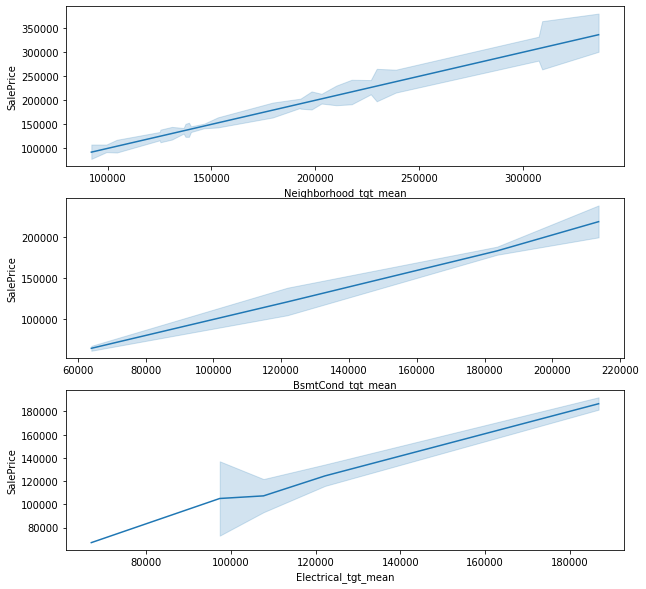

In [ ]:
f, axs = plt.subplots(3,1, figsize=(10,10))
i=0
for feature in ["Neighborhood_tgt_mean", "BsmtCond_tgt_mean", "Electrical_tgt_mean"]:
  
  sns.lineplot(x=X_train_r[feature], y=X_train_r["SalePrice"], ax=axs[i])

  i= i+1


## Probability Ratio Encoding (target discreto)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl', usecols=["sex", "cabin", "embarked", "survived"])
df.replace("?", np.nan, inplace=True)
df.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22 C26,S
2,0,female,C22 C26,S
3,0,male,C22 C26,S
4,0,female,C22 C26,S


In [ ]:
df["cabin"] = df["cabin"].astype(str).str[0]

In [ ]:
# and we remove the observations where cabin = T
# because they are too few

df = df[df['cabin']!= 'T']
df.shape


(1308, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    df["survived"],
                                                    train_size=0.7,
                                                    random_state=0)

In [ ]:
X_train.head()

,survived,sex,cabin,embarked
588,1,female,n,S
428,1,female,n,S
479,1,female,n,C
1229,0,male,n,S
454,1,male,n,S


In [ ]:
target_mean_per_cabin = X_train.groupby(['cabin'])['survived'].mean()
prob_df = pd.DataFrame(target_mean_per_cabin)
prob_df

,survived
cabin,
A,0.437500
B,0.789474
C,0.625000
D,0.657143
E,0.758621
F,0.529412
G,0.750000
n,0.294034


In [ ]:
prob_df["dead"] = 1 - prob_df["survived"]
prob_df.head()

,survived,dead
cabin,,
A,0.437500,0.562500
B,0.789474,0.210526
C,0.625000,0.375000
D,0.657143,0.342857
E,0.758621,0.241379


In [ ]:
prob_df['ratio'] = prob_df['survived'] / prob_df["dead"]

prob_df

,survived,dead,ratio
cabin,,,
A,0.437500,0.562500,0.777778
B,0.789474,0.210526,3.750000
C,0.625000,0.375000,1.666667
D,0.657143,0.342857,1.916667
E,0.758621,0.241379,3.142857
F,0.529412,0.470588,1.125000
G,0.750000,0.250000,3.000000
n,0.294034,0.705966,0.416499


In [ ]:
ordered_labels = prob_df['ratio'].to_dict()

ordered_labels

{'A': 0.7777777777777778,
 'B': 3.7500000000000004,
 'C': 1.6666666666666667,
 'D': 1.9166666666666667,
 'E': 3.1428571428571423,
 'F': 1.125,
 'G': 3.0,
 'n': 0.4164989939637826}

In [ ]:
X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [ ]:
def probability_ratio_encoding(X_train, X_test, features, target):
  
  X_train_r = X_train.copy()
  X_test_r = X_test.copy()

  for feature in features:

    tmp = pd.DataFrame(X_train_r.groupby(feature)[target].mean())
    
    tmp["no-target"] = 1 - tmp[target]

    tmp["ratio"] = tmp[target] / tmp["no-target"]
    
    ordinal_mapping = tmp["ratio"].to_dict()

    X_train_r[feature+"_ratio_enco"] = X_train[feature].map(ordinal_mapping)
    X_test_r[feature+"_ratio_enco"] = X_test[feature].map(ordinal_mapping)

  return (X_train_r, X_test_r)

In [ ]:
X_train_r, X_test_r = probability_ratio_encoding(X_train, X_test, ['sex', 'embarked'], "survived")
X_train_r.head()

,survived,sex,cabin,embarked,sex_ratio_enco,embarked_ratio_enco
588,1,female,0.416499,S,2.620690,0.494226
428,1,female,0.416499,S,2.620690,0.494226
479,1,female,0.416499,C,2.620690,1.312500
1229,0,male,0.416499,S,0.244813,0.494226
454,1,male,0.416499,S,0.244813,0.494226
